In [1]:
import tensorflow as tf
from  tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

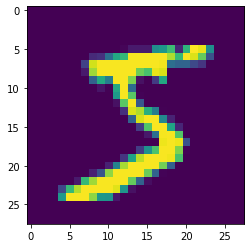

In [5]:
plt.imshow(X_train[0].astype('uint8'))

In [6]:
X_train=X_train/255
X_test = X_test/255

In [7]:
y_train[0]

5

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = "sigmoid")
   
])

In [9]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              
             
             )

## Tensorboard

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)


2022-07-16 19:13:56.226297: I tensorflow/python/profiler/internal/profiler_wrapper.cc:182] Profiling will start immediately because delay_ms was unset or zero.
2022-07-16 19:13:56.226398: I tensorflow/core/profiler/lib/profiler_session.cc:133] Profiler session started.


In [107]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,epochs =10, callbacks=[tensorboard_callback])

Epoch 1/10
 423/1875 [=====>........................] - ETA: 0s - loss: 0.0058 - accuracy: 0.9984

2022-07-16 19:15:38.510347: I tensorflow/python/profiler/internal/profiler_wrapper.cc:182] Profiling will start immediately because delay_ms was unset or zero.
2022-07-16 19:15:38.510362: I tensorflow/core/profiler/lib/profiler_session.cc:133] Profiler session started.
2022-07-16 19:15:38.523066: I tensorflow/core/profiler/rpc/client/save_profile.cc:133] Creating directory: logs/train/plugins/profile/2022_07_16_19_15_38
2022-07-16 19:15:38.523660: I tensorflow/core/profiler/rpc/client/save_profile.cc:139] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_07_16_19_15_38/Priyankas-MacBook-Air.local.trace.json.gz
2022-07-16 19:15:38.528004: I tensorflow/core/profiler/rpc/client/save_profile.cc:133] Creating directory: logs/train/plugins/profile/2022_07_16_19_15_38
2022-07-16 19:15:38.528170: I tensorflow/core/profiler/rpc/client/save_profile.cc:139] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2022_07_16_19_15_38/Priyankas-M

1875/1875 [==============================] - 1s 435us/step - loss: 0.0093 - accuracy: 0.9970
Epoch 2/10
1875/1875 [==============================] - 1s 671us/step - loss: 0.0097 - accuracy: 0.9967
Epoch 3/10
1875/1875 [==============================] - 1s 483us/step - loss: 0.0115 - accuracy: 0.99650s - los
Epoch 4/10
1875/1875 [==============================] - 1s 444us/step - loss: 0.0099 - accuracy: 0.9967
Epoch 5/10
1875/1875 [==============================] - 1s 436us/step - loss: 0.0083 - accuracy: 0.9977
Epoch 6/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.0106 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 1s 381us/step - loss: 0.0077 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 1s 448us/step - loss: 0.0081 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 1s 393us/step - loss: 0.0097 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 1s 407us/s

## Launch Tensorboard

In [34]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with -4).

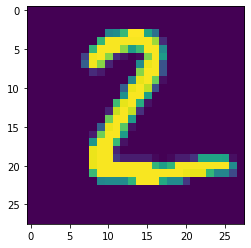

In [23]:
plt.imshow(X_test[1])

In [24]:
y_predict = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
y_predict[0]

array([9.3407005e-14, 1.3506918e-03, 2.9889971e-08, 1.2672889e-01,
       1.1601101e-09, 2.8660597e-08, 2.1550383e-12, 1.0000000e+00,
       1.0574599e-06, 1.3428010e-03], dtype=float32)

In [26]:
np.argmax(y_predict[0])

7

In [27]:

y_pred_label = [np.argmax(i) for i in y_predict]

In [28]:
y_pred_label[ :5]

[7, 2, 1, 0, 4]

In [29]:
matrix = tf.math.confusion_matrix(labels = y_test ,predictions = y_pred_label)

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

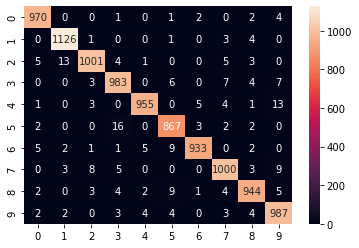

In [30]:
import seaborn as sn
sn.heatmap(matrix, annot =True, fmt= 'd')
plt.xlabel

In [31]:
model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 264us/step - loss: 0.1411 - accuracy: 0.9792


[0.14111162722110748, 0.979200005531311]